# Expectation Maximization and Gaussian Mixture Models (GMM)

In [12]:
import numpy as np
from scipy.stats import norm
np.random.seed(0)

X = np.linspace(-5, 5, num=20)
X0 = X * np.random.rand(len(X)) + 10
X1 = X * np.random.rand(len(X)) - 10
X2 = X * np.random.rand(len(X))

X_tot = np.stack((X0, X1, X2)).flatten()

r = np.zeros((len(X_tot), 3))
print("Dimensionality", '=', np.shape(r))

gauss_1 = norm(loc=-5, scale=5)
gauss_2 = norm(loc=8, scale=3)
gauss_3 = norm(loc=1.5, scale=1)

for c, g in zip(range(3), [gauss_1, gauss_2, gauss_3]):
    r[:, c] = g.pdf(X_tot)

for i in range(len(r)):
    r[i] = r[i] / np.sum(r, axis=1)[i]

print(r)
print(np.sum(r, axis=1))

Dimensionality = (60, 3)
[[2.97644006e-02 9.70235407e-01 1.91912550e-07]
 [3.85713024e-02 9.61426220e-01 2.47747304e-06]
 [2.44002651e-02 9.75599713e-01 2.16252823e-08]
 [1.86909096e-02 9.81309090e-01 8.07574590e-10]
 [1.37640773e-02 9.86235923e-01 9.93606589e-12]
 [1.58674083e-02 9.84132592e-01 8.42447356e-11]
 [1.14191259e-02 9.88580874e-01 4.48947365e-13]
 [1.34349421e-02 9.86565058e-01 6.78305927e-12]
 [1.11995848e-02 9.88800415e-01 3.18533028e-13]
 [8.57645259e-03 9.91423547e-01 1.74498648e-15]
 [7.64696969e-03 9.92353030e-01 1.33051021e-16]
 [7.10275112e-03 9.92897249e-01 2.22285146e-17]
 [6.36154765e-03 9.93638452e-01 1.22221112e-18]
 [4.82376290e-03 9.95176237e-01 1.55549544e-22]
 [7.75866904e-03 9.92241331e-01 1.86665135e-16]
 [7.52759691e-03 9.92472403e-01 9.17205413e-17]
 [8.04550643e-03 9.91954494e-01 4.28205323e-16]
 [3.51864573e-03 9.96481354e-01 9.60903037e-30]
 [3.42631418e-03 9.96573686e-01 1.06921949e-30]
 [3.14390460e-03 9.96856095e-01 3.91217273e-35]
 [1.00000000e+0

In [13]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

X = np.linspace(-5, 5, num=20)
X0 = X * np.random.rand(len(X)) + 10
X1 = X * np.random.rand(len(X)) - 10
X2 = X * np.random.rand(len(X))

X_tot = np.stack((X0, X1, X2)).flatten()

r = np.zeros((len(X_tot), 3))
print("Dimensionality", '=', np.shape(r))

gauss_1 = norm(loc=-5, scale=5)
gauss_2 = norm(loc=8, scale=3)
gauss_3 = norm(loc=1.5, scale=1)

pi = np.array([1/3, 1/3, 1/3])

for c, g, p in zip(range(3), [gauss_1, gauss_2, gauss_3], pi):
    r[:, c] = p * g.pdf(X_tot)

for i in range(len(r)):
    r[i] = r[i] / (np.sum(pi) * np.sum(r, axis=1)[i])

print(r)
print(np.sum(r, axis=1))

Dimensionality = (60, 3)
[[1.13641307e-02 9.88635869e-01 4.12387568e-13]
 [1.00171031e-02 9.89982897e-01 4.05935093e-14]
 [2.73525094e-02 9.72647413e-01 7.77938476e-08]
 [9.93142427e-03 9.90068576e-01 3.44142641e-14]
 [1.03321021e-02 9.89667898e-01 7.30254575e-14]
 [1.17558931e-02 9.88244107e-01 7.44553924e-13]
 [1.57359619e-02 9.84264038e-01 7.46939098e-11]
 [8.66503706e-03 9.91334963e-01 2.17333312e-15]
 [1.07384302e-02 9.89261570e-01 1.49210197e-13]
 [8.33413062e-03 9.91665869e-01 9.37343741e-16]
 [7.51485299e-03 9.92485147e-01 8.80930407e-17]
 [7.22103800e-03 9.92778962e-01 3.35018884e-17]
 [5.40291911e-03 9.94597081e-01 8.77480905e-21]
 [5.67846317e-03 9.94321537e-01 4.33660058e-20]
 [4.76799305e-03 9.95232007e-01 9.92010332e-23]
 [7.91538278e-03 9.92084617e-01 2.95799738e-16]
 [5.93567815e-03 9.94064322e-01 1.67237659e-19]
 [6.96519651e-03 9.93034803e-01 1.35698621e-17]
 [5.34257455e-03 9.94657425e-01 6.03735266e-21]
 [6.69061189e-03 9.93309388e-01 4.78276813e-18]
 [9.99999998e-0

C:\Users\kylec\AppData\Local\Temp\ipykernel_21440\810688137.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax0.scatter(X_tot[i], 0, c=np.array([r[i][0], r[i][1], r[i][2]]), s=100)


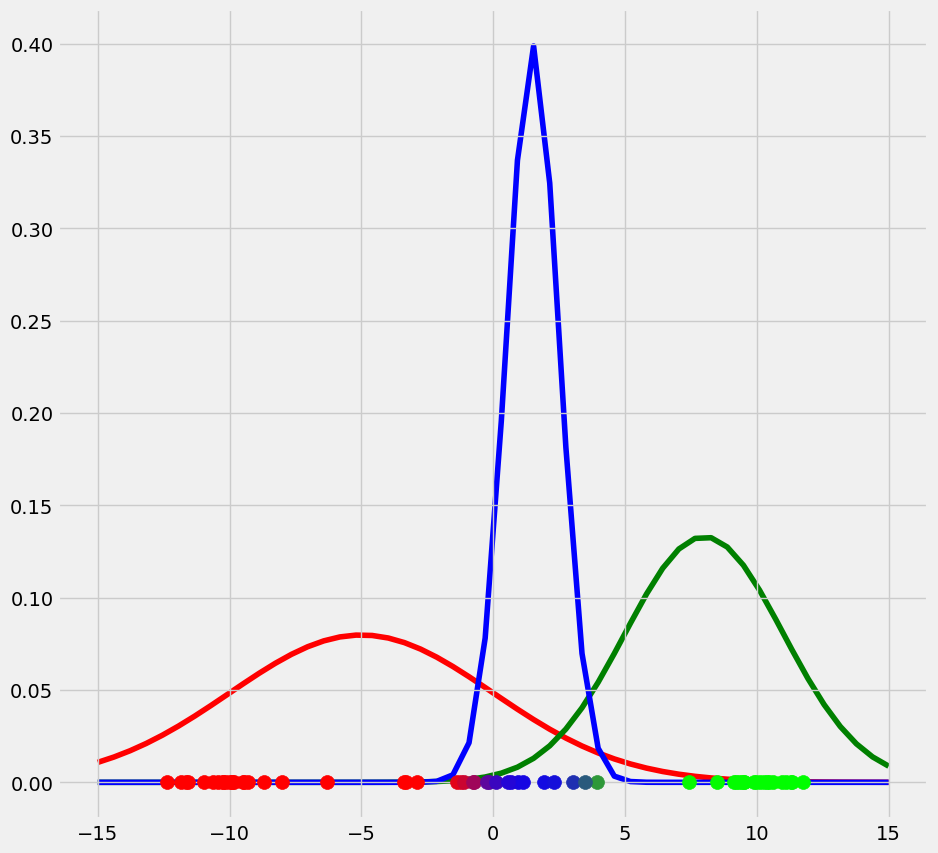

In [14]:
fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)

for i in range(len(r)):
    ax0.scatter(X_tot[i], 0, c=np.array([r[i][0], r[i][1], r[i][2]]), s=100)

for g, c in zip([gauss_1.pdf(np.linspace(-15, 15)), gauss_2.pdf(np.linspace(-15, 15)),
                 gauss_3.pdf(np.linspace(-15, 15))], ['r', 'g', 'b']):
    ax0.plot(np.linspace(-15, 15), g, c=c, zorder=0)

plt.show()

Dimensionality = (60, 3)


C:\Users\kylec\AppData\Local\Temp\ipykernel_21440\1040775501.py:53: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax0.scatter(X_tot[i], 0, c=np.array([r[i][0], r[i][1], r[i][2]]), s=100)


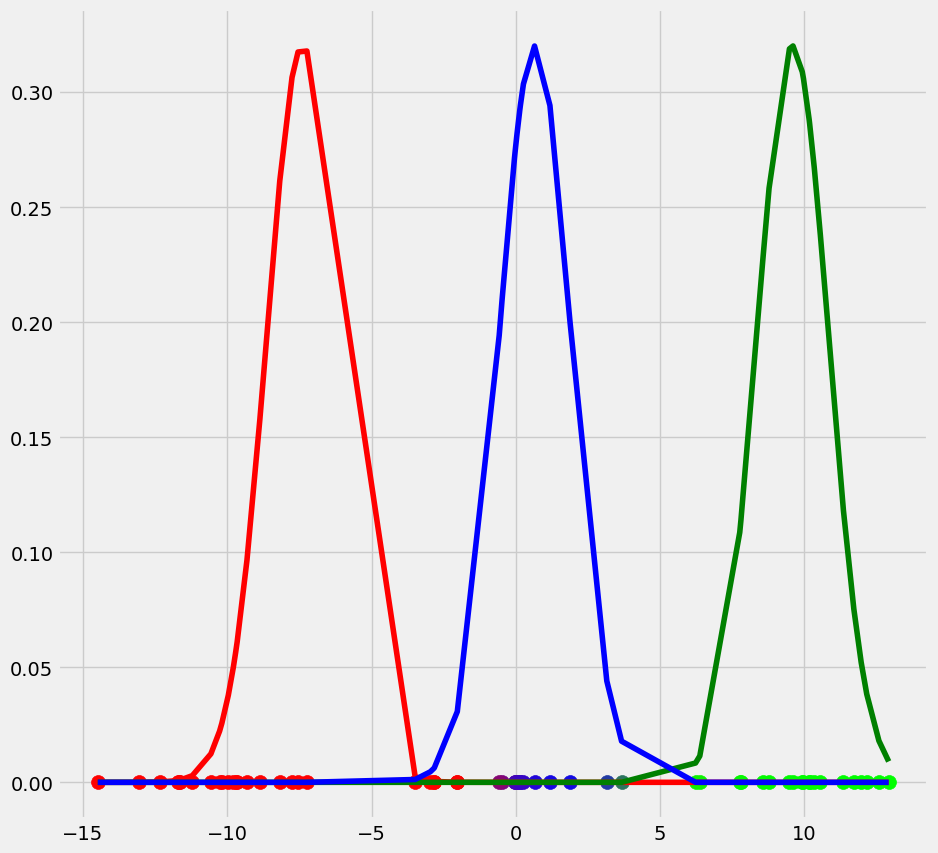

In [15]:
X = np.linspace(-5, 5, num=20)
X0 = X * np.random.rand(len(X)) + 10
X1 = X * np.random.rand(len(X)) - 10
X2 = X * np.random.rand(len(X))

X_tot = np.stack((X0, X1, X2)).flatten()

r = np.zeros((len(X_tot), 3))
print("Dimensionality", '=', np.shape(r))

gauss_1 = norm(loc=-5, scale=5)
gauss_2 = norm(loc=8, scale=3)
gauss_3 = norm(loc=1.5, scale=1)

m = np.array([1/3, 1/3, 1/3])
pi = m / np.sum(m)

for c, g, p in zip(range(3), [gauss_1, gauss_2, gauss_3], pi):
    r[:, c] = p * g.pdf(X_tot)


for i in range(len(r)):
    r[i] = r[i] / (np.sum(pi) * np.sum(r, axis=1)[i])


m_c = []
for c in range(len(r[0])):
    m = np.sum(r[:, c])
    m_c.append(m)

pi_c = []
for m in m_c:
    pi_c.append(m / np.sum(m_c))

mu_c = np.sum(X_tot.reshape(len(X_tot), 1) * r, axis=0) / m_c

var_c = []

for x in range(len(r[0])):
    var_c.append((1 / m_c[c]) * np.dot(((np.array(r[:, c]).reshape(60, 1)) * (X_tot.reshape(len(X_tot), 1) - mu_c[c])).T, 
                                       (X_tot.reshape(len(X_tot), 1) - mu_c[c])))
    

gauss_1 = norm(loc=mu_c[0], scale=var_c[0])
gauss_2 = norm(loc=mu_c[1], scale=var_c[1])
gauss_3 = norm(loc=mu_c[2], scale=var_c[2])


fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)

for i in range(len(r)):
    ax0.scatter(X_tot[i], 0, c=np.array([r[i][0], r[i][1], r[i][2]]), s=100)

for g, c in zip([gauss_1.pdf(np.sort(X_tot).reshape(60, 1)), 
                 gauss_2.pdf(np.sort(X_tot).reshape(60, 1)),
                 gauss_3.pdf(np.sort(X_tot).reshape(60, 1))],
                 ['r', 'g', 'b']):
    ax0.plot(np.sort(X_tot), g, c=c)

plt.show()

C:\Users\kylec\AppData\Local\Temp\ipykernel_21440\1527804976.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax0.scatter(X_tot[i], 0, c=np.array([r[i][0], r[i][1], r[i][2]]), s=100)


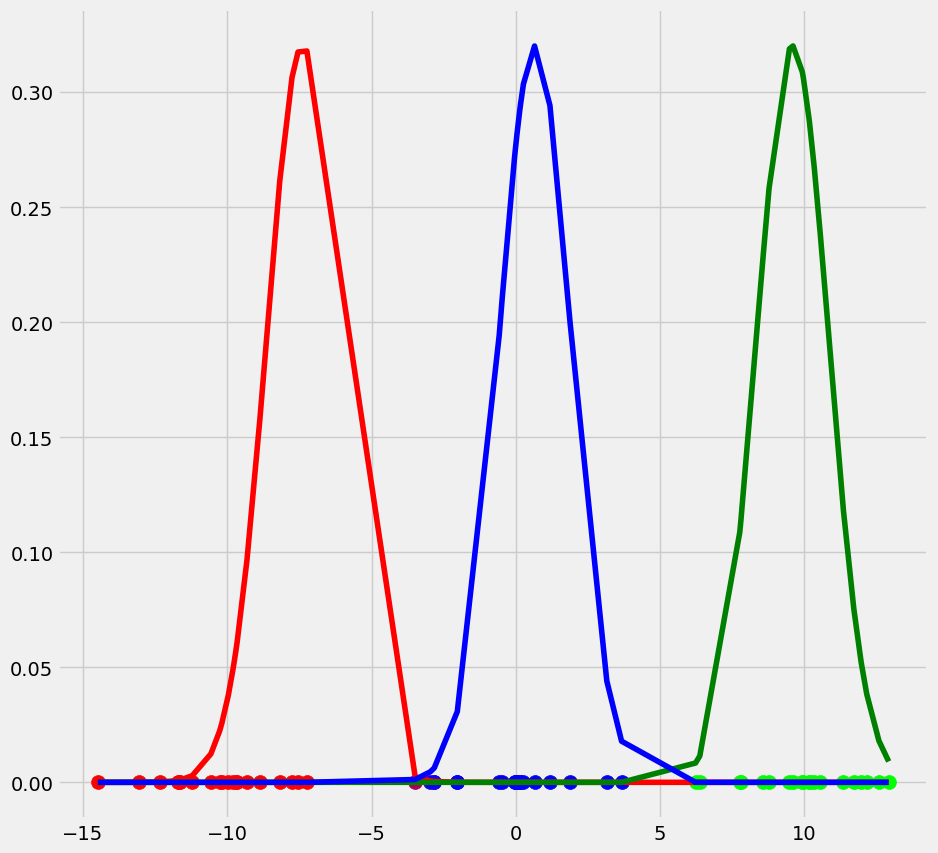

In [16]:
for c, g, p in zip(range(3), [gauss_1, gauss_2, gauss_3], pi):
    r[:, c] = p * g.pdf(X_tot)

for i in range(len(r)):
    r[i] = r[i] / (np.sum(pi_c) * np.sum(r, axis=1)[i])

fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)

for i in range(len(r)):
    ax0.scatter(X_tot[i], 0, c=np.array([r[i][0], r[i][1], r[i][2]]), s=100)

for g, c in zip([gauss_1.pdf(np.sort(X_tot).reshape(60, 1)),
                 gauss_2.pdf(np.sort(X_tot).reshape(60, 1)),
                 gauss_3.pdf(np.sort(X_tot).reshape(60, 1))],
                 ['r', 'g', 'b']):
    ax0.plot(np.sort(X_tot), g, c=c)

plt.show()

C:\Users\kylec\AppData\Local\Temp\ipykernel_21440\2572774434.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax0.scatter(self.X[i], 0, c=np.array([r[i][0],


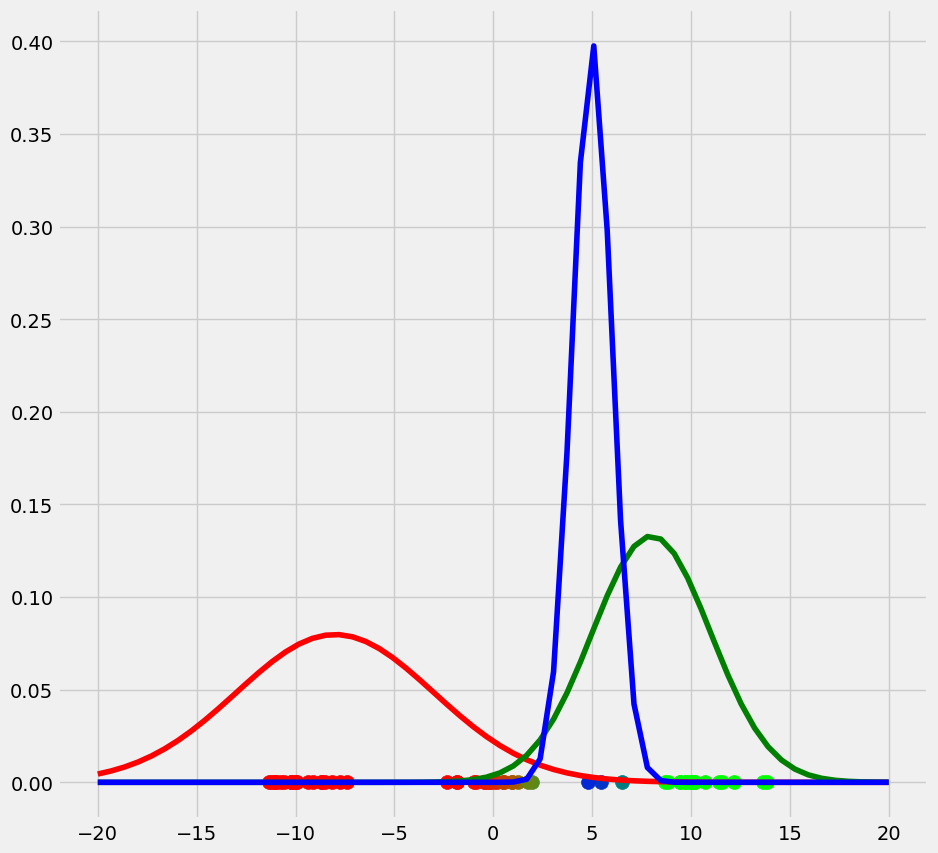

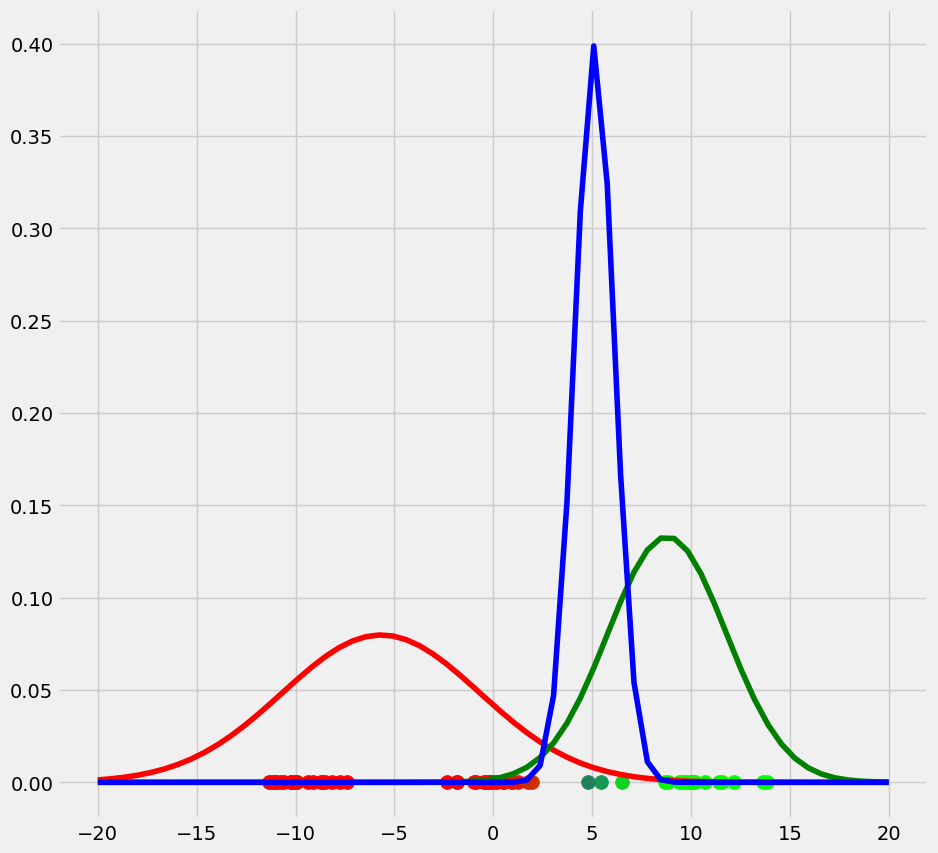

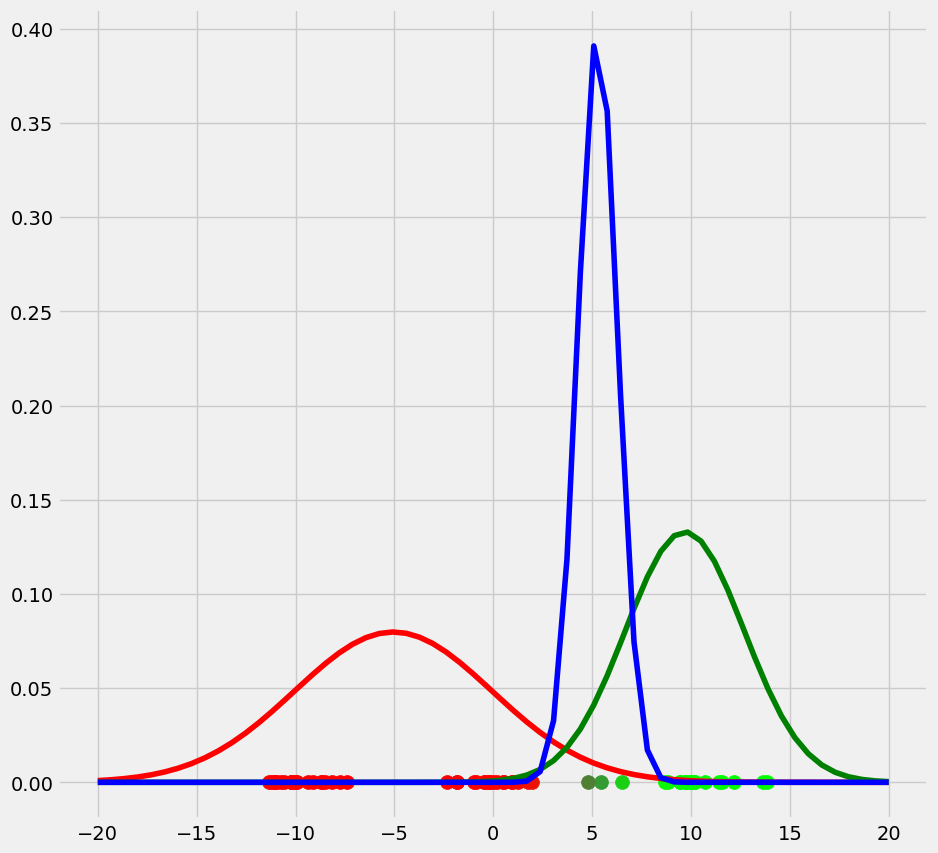

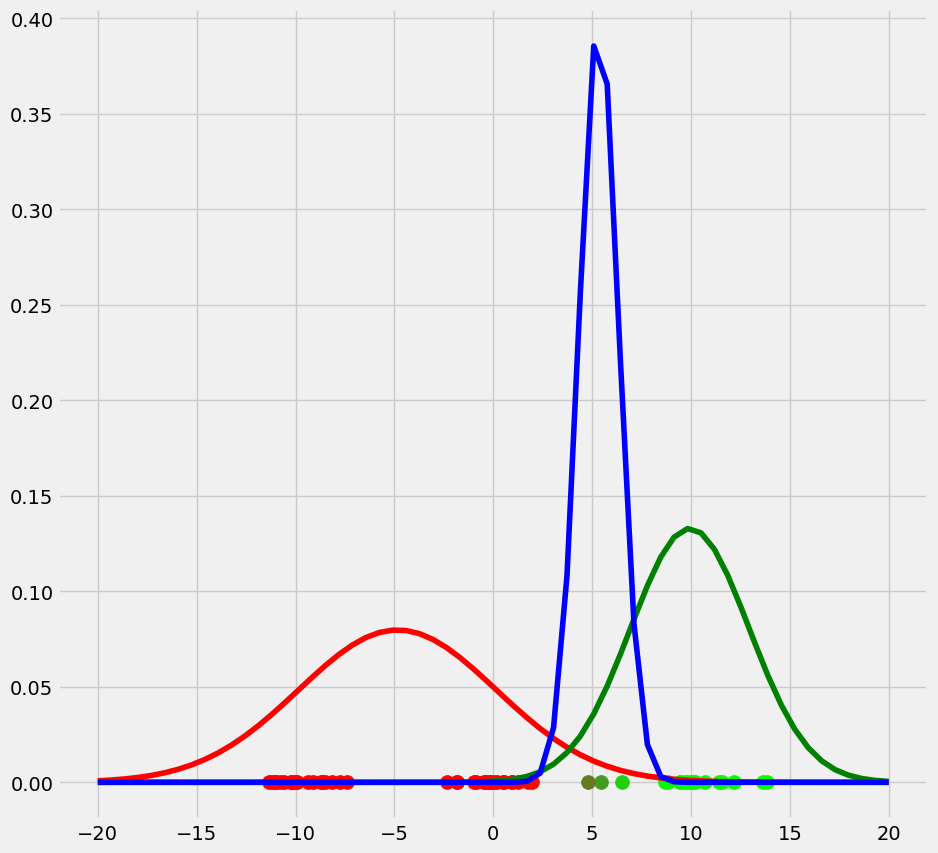

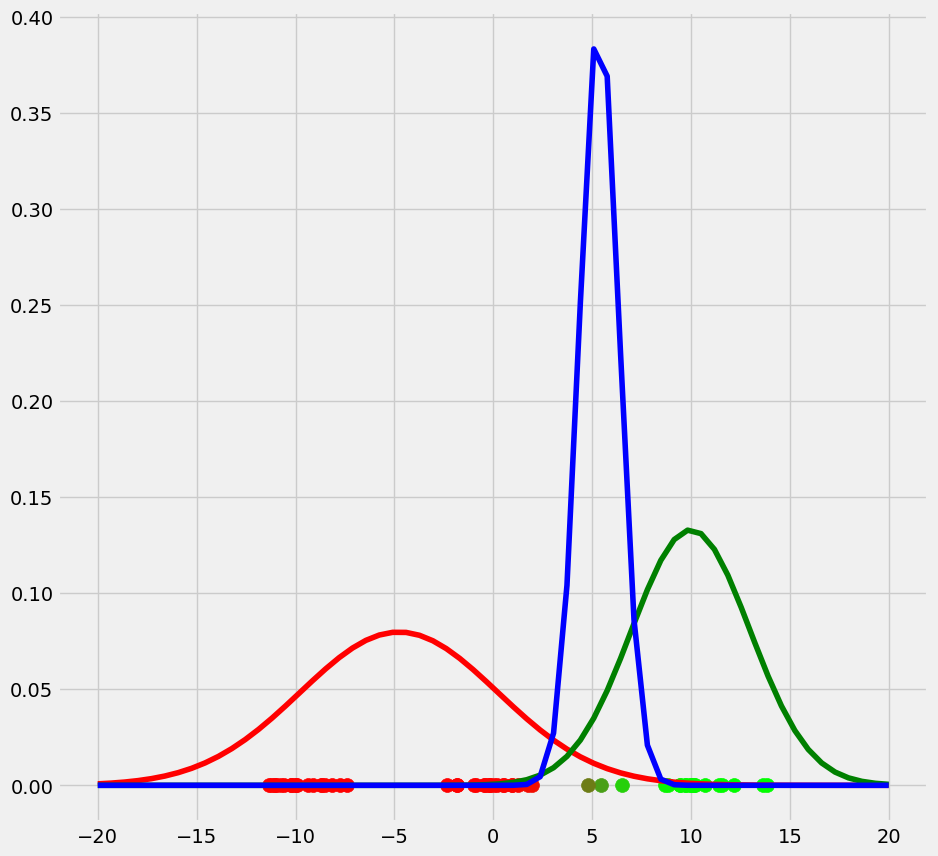

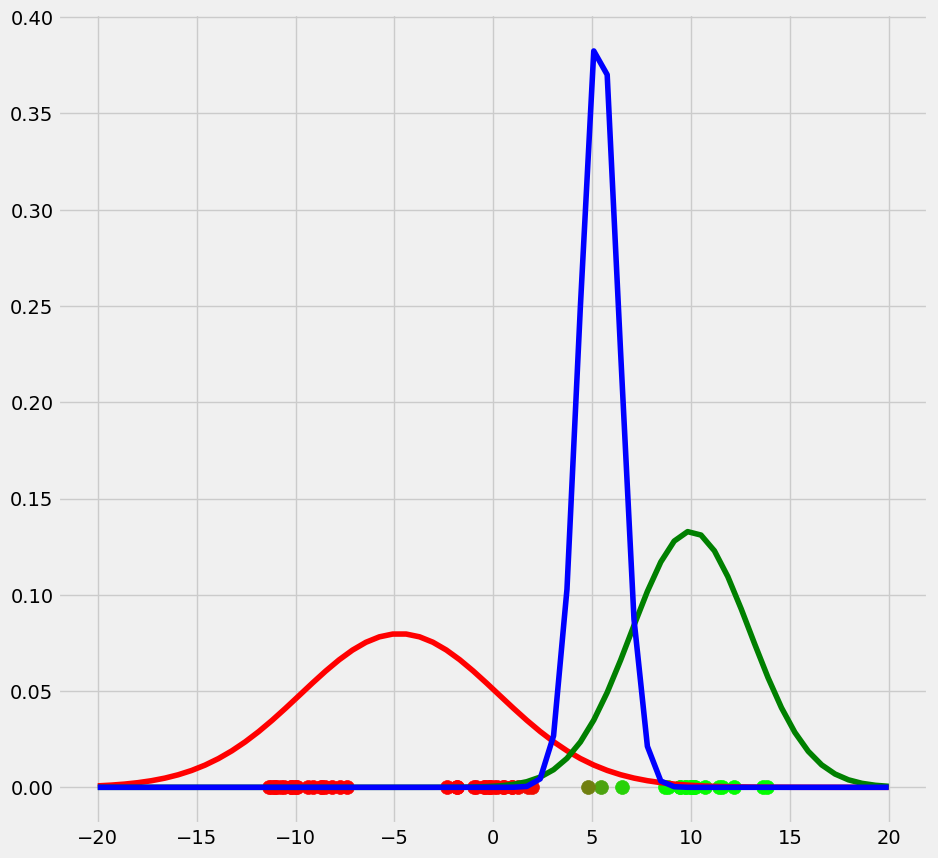

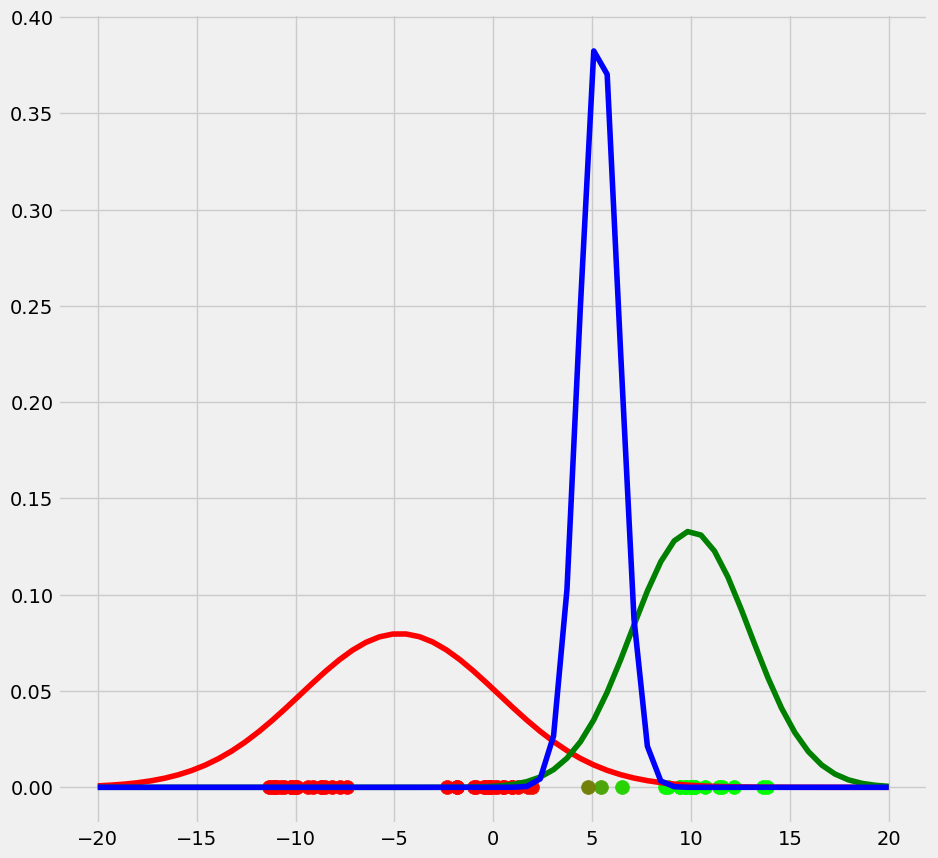

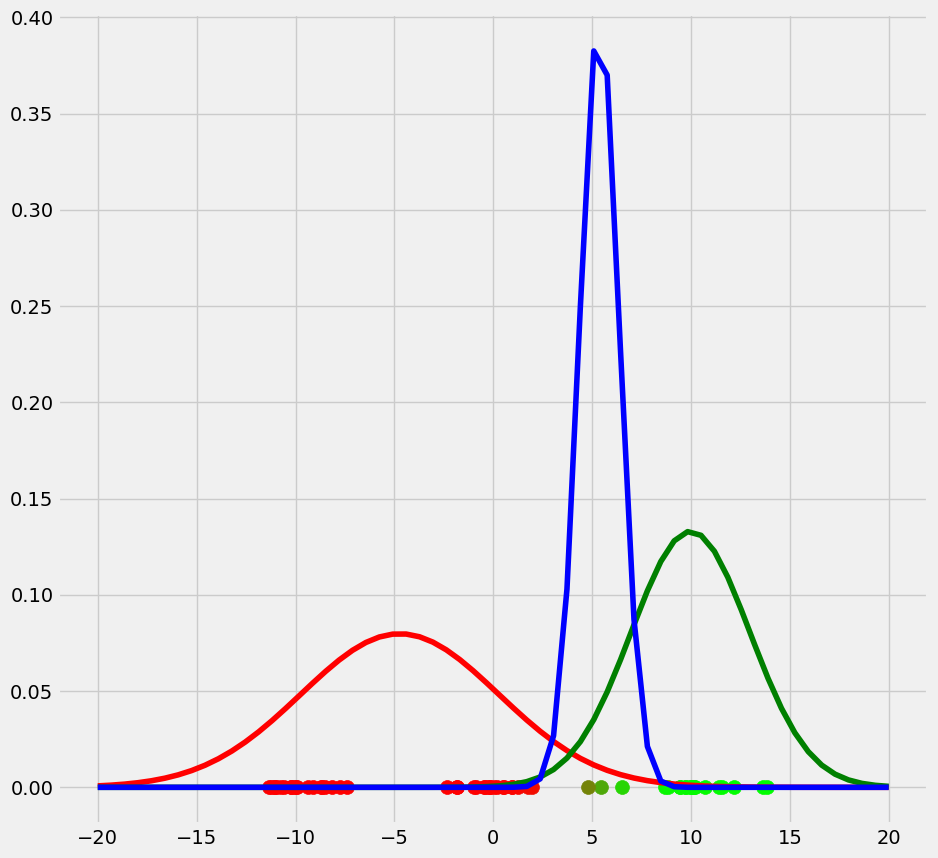

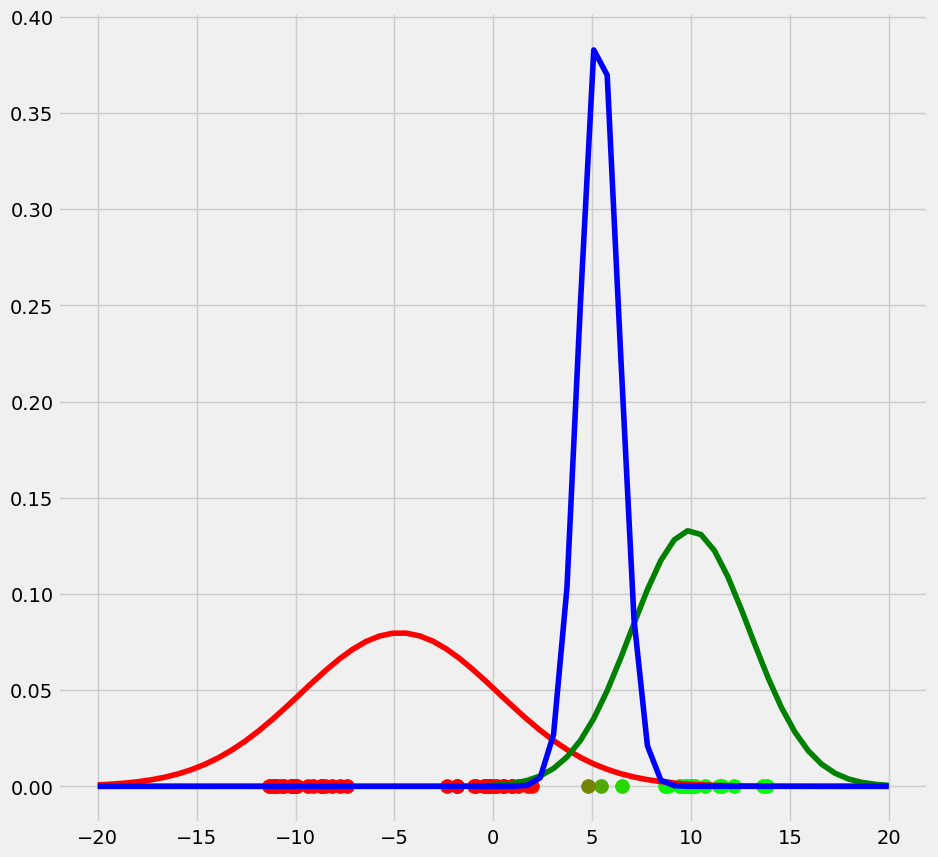

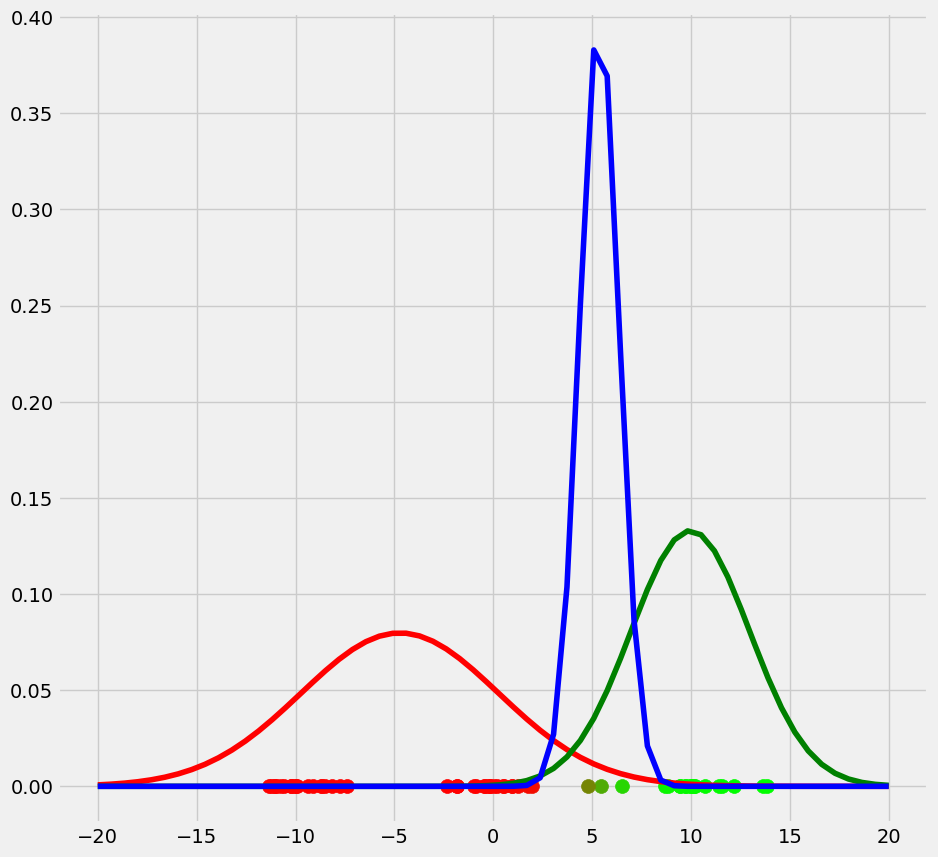

In [19]:
X = np.linspace(-5, 5, num=20)
X0 = X * np.random.rand(len(X)) + 10
X1 = X * np.random.rand(len(X)) - 10
X2 = X * np.random.rand(len(X))

X_tot = np.stack((X0, X1, X2)).flatten()


class GM1D:
    def __init__(self, X, iterations):
        self.iterations = iterations
        self.X = X
        self.mu = None
        self.pi = None
        self.var = None

    def run(self):
        self.mu = [-8, 8, 5]
        self.pi = [1/3, 1/3, 1/3]
        self.var = [5, 3, 1]

        for iter in range(self.iterations):
            r = np.zeros((len(X_tot), 3)) 

            for c, g, p in zip(range(3),
                               [norm(loc=self.mu[0], scale=self.var[0]),
                                norm(loc=self.mu[1], scale=self.var[1]),
                                norm(loc=self.mu[2], scale=self.var[2])], self.pi):
                r[:, c] = p * g.pdf(X_tot)

            for i in range(len(r)):
                r[i] = r[i] / (np.sum(pi) * np.sum(r, axis=1)[i])

            fig = plt.figure(figsize=(10, 10))
            ax0 = fig.add_subplot(111)

            for i in range(len(r)):
                ax0.scatter(self.X[i], 0, c=np.array([r[i][0], 
                                                      r[i][1],
                                                      r[i][2]]), s=100)
                
            for g, c in zip([norm(loc=self.mu[0], scale=self.var[0]).pdf(np.linspace(-20, 20, num=60)),
                             norm(loc=self.mu[1], scale=self.var[1]).pdf(np.linspace(-20, 20, num=60)),
                             norm(loc=self.mu[2], scale=self.var[2]).pdf(np.linspace(-20, 20, num=60))],
                             ['r', 'g', 'b']):
                ax0.plot(np.linspace(-20, 20, num=60), g, c=c)


            m_c = []

            for c in range(len(r[0])):
                m = np.sum(r[:, c])
                m_c.append(m)

            for k in range(len(m_c)):
                self.pi[k] = (m_c[k] / np.sum(m_c))

            self.mu = np.sum(self.X.reshape(len(self.X), 1) * r, axis=0) / m_c

            var_c = []

            for c in range(len(r[0])):
                var_c.append((1 / m_c[c]) * np.dot(((np.array(r[:, c]).reshape(60, 1)) * \
                            (self.X.reshape(len(self.X), 1) - self.mu[c])).T,
                            (self.X.reshape(len(self.X), 1) - self.mu[c])))
                
            plt.show()

GM1D = GM1D(X_tot, 10)
GM1D.run()


ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

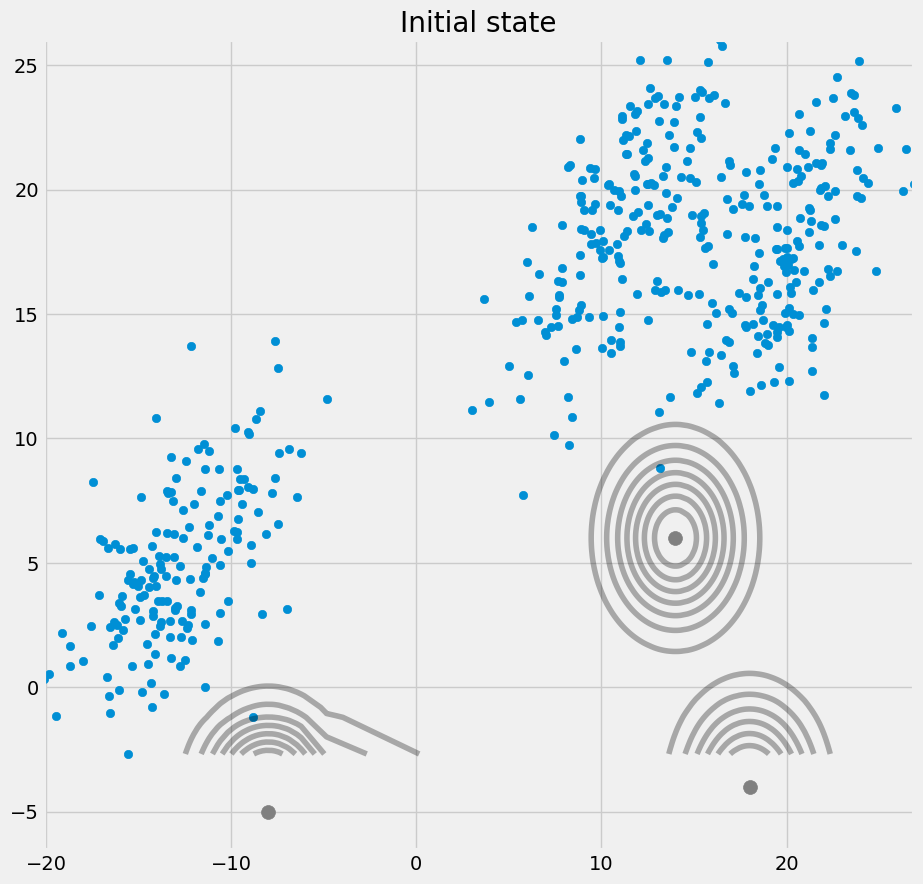

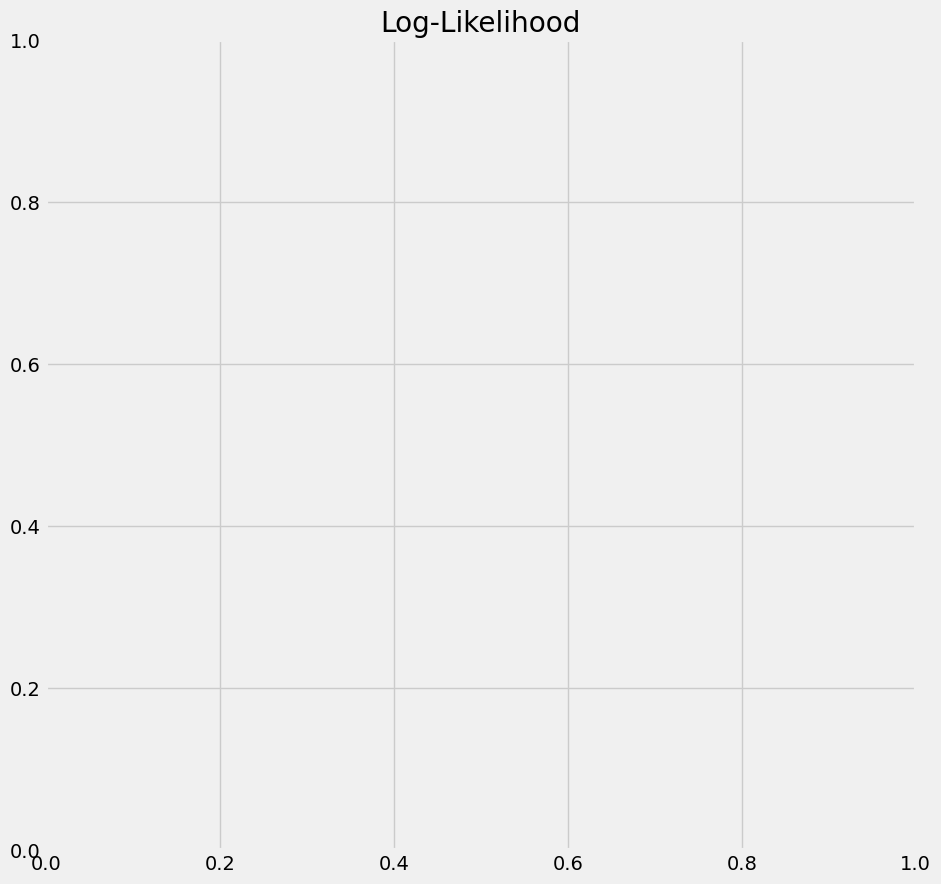

In [25]:
from sklearn.datasets._samples_generator import make_blobs
from scipy.stats import multivariate_normal

X, Y = make_blobs(cluster_std=1.5, random_state=20, n_samples=500, centers=3)

X = np.dot(X, np.random.RandomState(0).randn(2, 2))

class GMM:
    def __init__(self, X, number_of_sources, iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None


    def run(self):
        self.reg_cov = 1e-6 * np.identity(len(self.X[0]))
        x, y = np.meshgrid(np.sort(self.X[:, 0]), np.sort(self.X[:, 1]))
        self.XY = np.array([x.flatten(), y.flatten()]).T

        self.mu = np.random.randint(min(self.X[:, 0]), max(self.X[:, 0]),
                                    size=(self.number_of_sources, len(self.X[0])))
        self.cov = np.zeros((self.number_of_sources, len(X[0]), len(X[0])))

        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim], 5)

        self.pi = np.ones(self.number_of_sources) / self.number_of_sources
        log_likelihoods = []

        
        fig = plt.figure(figsize=(10, 10))
        ax0 = fig.add_subplot(111)
        ax0.scatter(self.X[:, 0], self.X[:, 1])
        ax0.set_title('Initial state')
        
        for m, c in zip(self.mu, self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m, cov=c)

            ax0.contour(np.sort(self.X[:, 0]), np.sort(self.X[:, 1]),
                        multi_normal.pdf(self.XY).reshape(len(self.X), len(self.X)),
                        colors='black', alpha=0.3)
            ax0.scatter(m[0], m[1], c='grey', zorder=10, s=100)

        for i in range(self.iterations):
            r_ic = np.zeros((len(self.X), len(self.cov)))

            for m, co, p, r in zip(self.mu, self.cov, self.pi, range(len(r_ic[0]))):
                co += self.reg_cov
                mn = multivariate_normal(mean=m, cov=co)
                r_ic[:, r] = p * mn.pdf(self.X) / np.sum([pi_c * multivariate_normal(mean=mu_c, cov=cov_c).pdf(X) \
                                                          for pi_c, mu_c, cov_c in zip(self.pi, self.mu, self.cov + self.reg_cov)], axis=0)
                
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []


            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:, c], axis=0)
                mu_c = (1 / m_c) * np.sum(self.X * r_ic[:, c].reshape(len(self.X), 1), axis=0)
                
                self.mu.append(mu_c)
                self.cov.append(((1 / m_c) * np.dot((np.array(r_ic[:, c]).reshape(len(self.X), 1) * (self.X - mu_c)).T, (self.X - mu_c))) + self.reg_cov)
                self.pi.append(m_c / np.sum(r_ic))

            log_likelihoods.append(np.log(np.sum([k * multivariate_normal(self.mu[i], self.cov[j]).pdf(X) for k, i, j in zip(self.pi, range(len(self.mu)), range(len(self.cov)))])))

            fig2 = plt.figure(figsize=(10, 10))
            ax1 = fig2.add_subplot(111)
            ax1.set_title('Log-Likelihood')
            ax1.plot(range(0, self.iterations, 1), log_likelihoods)

    def predict(self, Y):
        fig3 = plt.figure(figsize=(10, 10))
        ax2 = fig3.add_subploT(111)
        ax2.scatter(self.X[:, 0], self.X[:, 1])

        for m, c in zip(self.mu, self.cov):
            multi_normal = multivariate_normal(mean=m, cov=c)

            ax2.contour(np.sort(self.X[:, 0]), np.sort(self.X[:, 1]), multi_normal.pdf(self.XY).reshape(len(self.X), len(self.X)), colors='black', alpha=0.3)
            ax2.scatter(m[0], m[1], c='grey', zorder=10, s=100)
            ax2.set_title('Final State')
            
            for y in Y:
                ax2.scatter(y[0], y[1], c='orange', zorder=10, s=100)
            
        prediction = []

        for m, c in zip(self.mu, self.cov):
            prediction.append(multivariate_normal(mean=m, cov=c). pdf(Y) / np.sum([multivariate_normal(mean=mean, cov=cov).pdf(Y) for mean, cov in zip(self.mu, self.cov)]))

        return prediction
    
GMM = GMM(X, 3, 50)
GMM.run()
GMM.predict([[0.5, 0.5]])


Converged:  True
[[5.02664415e-44 9.36305075e-82 4.00098007e-33 1.00000000e+00
  1.94756664e-93]]


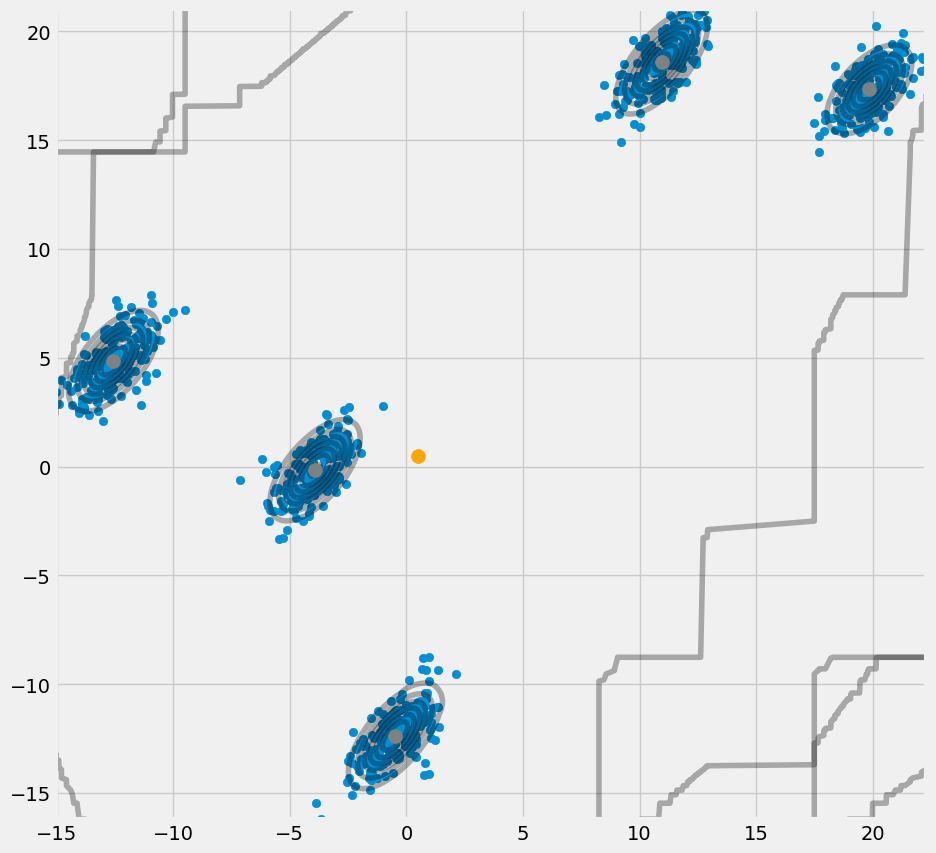

In [26]:
from sklearn.mixture import GaussianMixture

X, Y = make_blobs(cluster_std=0.5, random_state=20, n_samples=1000, centers=5)

X = np.dot(X, np.random.RandomState(0).randn(2, 2))

x, y = np.meshgrid(np.sort(X[:, 0]), np.sort(X[:, 1]))
XY = np.array([x.flatten(), y.flatten()]).T

GMM = GaussianMixture(n_components=5).fit(X)

print('Converged: ', GMM.converged_)

means = GMM.means_
covariances = GMM.covariances_

Y = np.array([[0.5], [0.5]])
prediction = GMM.predict_proba(Y.T)
print(prediction)

fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)
ax0.scatter(X[:, 0], X[:, 1])
ax0.scatter(Y[0, :], Y[1, :], c='orange', zorder=10, s=100)

for m, c in zip(means, covariances):
    multi_normal = multivariate_normal(mean=m, cov=c)

    ax0.contour(np.sort(X[:, 0]), np.sort(X[:, 1]), multi_normal.pdf(XY).reshape(len(X), len(X)), colors='black', alpha=0.3)
    ax0.scatter(m[0], m[1], c='grey', zorder=10, s=100)

plt.show()